<a href="https://colab.research.google.com/github/sspaulc/EDA--ABTN0105-Play-Store-App-Review-Analysis/blob/main/Sanchita_Paul_Play_Store_App_Review_Analysis_%5BABTN0105%5D_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
#import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mount the drive and import csv files into different data frames
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
playstore_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Module 1/Week 4/Day 3/Play Store Data.csv")

In [4]:
user_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Module 1/Week 4/Day 3/User Reviews.csv")

In [5]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
playstore_df_no_duplicates= playstore_df.drop_duplicates().reset_index()

In [7]:
playstore_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10358 non-null  int64  
 1   App             10358 non-null  object 
 2   Category        10358 non-null  object 
 3   Rating          8893 non-null   float64
 4   Reviews         10358 non-null  object 
 5   Size            10358 non-null  object 
 6   Installs        10358 non-null  object 
 7   Type            10357 non-null  object 
 8   Price           10358 non-null  object 
 9   Content Rating  10357 non-null  object 
 10  Genres          10358 non-null  object 
 11  Last Updated    10358 non-null  object 
 12  Current Ver     10350 non-null  object 
 13  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


In [62]:
plt.rcParams["figure.figsize"]=(10,7.5)

In [8]:
#Convert the string row to integers

def convert_string_integers(installs):
  '''This function coverts all the string elements to integer in the install column'''
  str_installs=""
  installs_list=installs.split(",")
  for item in installs_list:
    #iterate over the list
    str_installs=str_installs+ item
  try:
    int_installs= int(str_installs[:-1])
    return int_installs #
  except ValueError:
    #For '' strings 
    return 0

In [9]:

playstore_df_no_duplicates['Int_Installs']= playstore_df_no_duplicates['Installs'].apply(convert_string_integers)

In [10]:
playstore_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10358 non-null  int64  
 1   App             10358 non-null  object 
 2   Category        10358 non-null  object 
 3   Rating          8893 non-null   float64
 4   Reviews         10358 non-null  object 
 5   Size            10358 non-null  object 
 6   Installs        10358 non-null  object 
 7   Type            10357 non-null  object 
 8   Price           10358 non-null  object 
 9   Content Rating  10357 non-null  object 
 10  Genres          10358 non-null  object 
 11  Last Updated    10358 non-null  object 
 12  Current Ver     10350 non-null  object 
 13  Android Ver     10355 non-null  object 
 14  Int_Installs    10358 non-null  int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.2+ MB


In [85]:
playstore_df_no_duplicates.drop_duplicates(subset= 'App',keep= 'first',inplace=True)


In [87]:
playstore_df_no_duplicates.shape

(9661, 15)

In [75]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Text(0.5, 1.0, 'MOST NUMBER OF RATINGS')

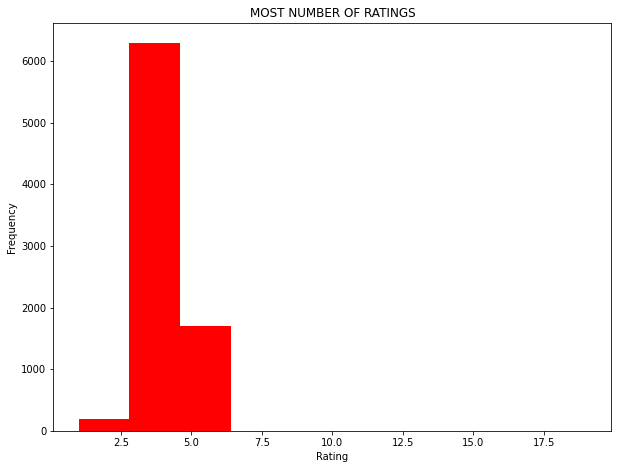

In [88]:
#Use histogram to check where most of the reviews lie

rating= playstore_df_no_duplicates['Rating']

plt.hist(rating.values,color= "red")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('MOST NUMBER OF RATINGS')

In [13]:
import seaborn as sns


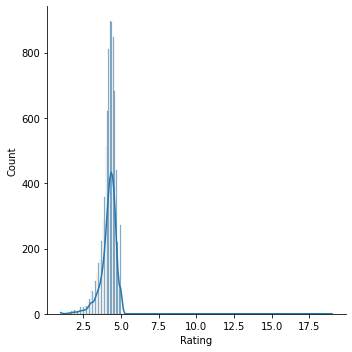

In [89]:
sns.displot(playstore_df_no_duplicates['Rating'],kde= True )

In [90]:
playstore_df_no_duplicates['Rating'].value_counts().head(5)

4.3    897
4.4    895
4.5    848
4.2    811
4.6    683
Name: Rating, dtype: int64

The maximum number of ratings lie in the range of 4.2 and 4.6.

Question 1: What is the overall sentiment among the users?

In [19]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [20]:
sentiment= user_df['Sentiment']

In [102]:
sentiments=sentiment.dropna()

In [103]:
sentiments.value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [104]:
sentiments.value_counts('Negative')*100

Positive    64.110921
Negative    22.096068
Neutral     13.793011
Name: Sentiment, dtype: float64

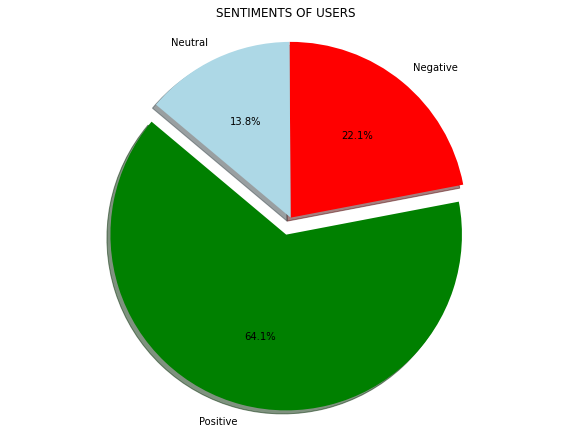

In [106]:
# Data to plot
labels = 'Positive', 'Negative','Neutral'
sizes = [64.11, 22.09, 13.79]
colors = ['green', 'red', 'lightblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('SENTIMENTS OF USERS')
plt.show()

As we can infer from the pie chart that overall the users have had a positive response to the apps. Which can also be twice confirmed from the maximum number of reviews lying between 4.2-4.6 .

This quantification of sentiment being more indicative towards positive can be used to infer the psychology of the users. There is a more positive outlook towards most of the products and thus an investment seems viable.

Q2: Now that we have seen that mostly the sentiment of the users,let us find the most readily available categories?

In [93]:
playstore_df_no_duplicates['Category'].shape

(9661,)

In [113]:
#Supply of apps depending on what category is most produced.

In [146]:
supply=playstore_df_no_duplicates['Category'].value_counts()

Text(0.5, 1.0, 'SUPPLY OF THE APPS DEPENDING ON THEIR CATEGORIES')

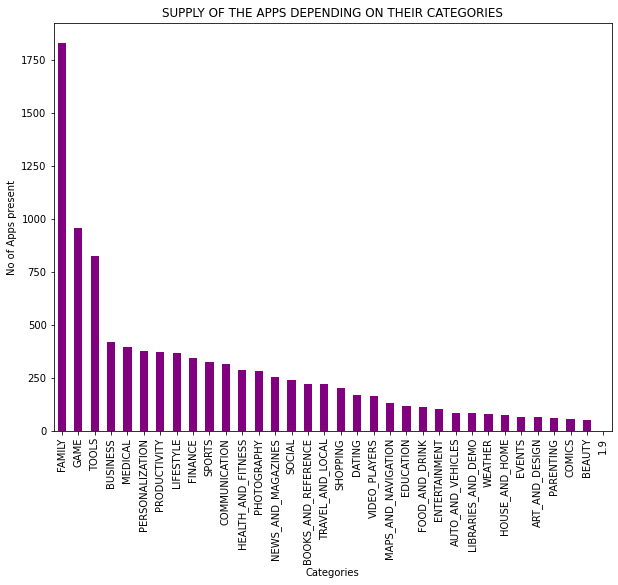

In [147]:
supply.plot(kind= 'bar',color= 'purple')
plt.xlabel('Categories')
plt.ylabel('No of Apps present')
plt.title('SUPPLY OF THE APPS DEPENDING ON THEIR CATEGORIES')

From the above bar graph,from each category we can infer that Category 'Family' and 'Games' are the most available.Thus we can also assume that these categories have a higher success rate with a higher supply rate.

In [114]:
#Demand of apps depending on the number of installments

In [142]:
demand= playstore_df_no_duplicates.groupby('Category')['Int_Installs'].sum().sort_values(ascending= False)

In [145]:
#Standarddize demand 

In [143]:
demand= demand/10000000

In [144]:
demand.head(5)

Category
GAME             1387.892441
COMMUNICATION    1103.827625
TOOLS             800.177192
PRODUCTIVITY      579.309137
SOCIAL            548.786790
Name: Int_Installs, dtype: float64

Text(0.5, 1.0, 'DEMAND OF THE APPS DEPENDING ON THEIR CATEGORIES')

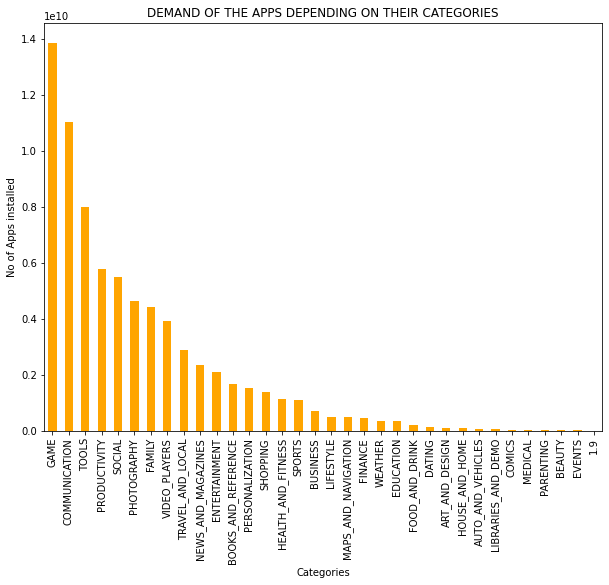

In [137]:
demand.plot(kind='bar',color='orange')
plt.xlabel('Categories')
plt.ylabel('No of Apps installed')
plt.title('DEMAND OF THE APPS DEPENDING ON THEIR CATEGORIES')

From the above graph we can clearly conclude the most popular categories as 'Game','Communcation','Tools'. Depending on the number of installments we can determine the demand of customers.

Q3: Now that we have the relationship of different categories with the demand and supply,lets try to find if there is any actual positive correlation between the two?

In [152]:
#Create a data frame

In [170]:
demand_supplys=pd.DataFrame({'Demand':demand, 'Supply': supply})

In [171]:
demand_supplys.head(5)

,Demand,Supply
1.9,0.000000,1
ART_AND_DESIGN,11.433810,64
AUTO_AND_VEHICLES,5.313021,85
BEAUTY,2.719705,53
BOOKS_AND_REFERENCE,166.596958,222


Text(0, 0.5, 'Standardized frequencies')

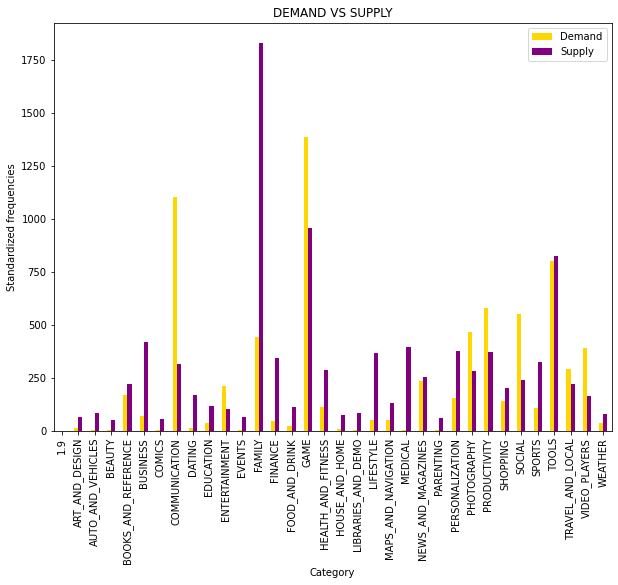

In [175]:
demand_supplys.plot(kind='bar',color=['gold','purple'])
plt.title('DEMAND VS SUPPLY')
plt.xlabel('Category')
plt.ylabel('Standardized frequencies')

There is no proper relationship between supply and demand across the categories.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


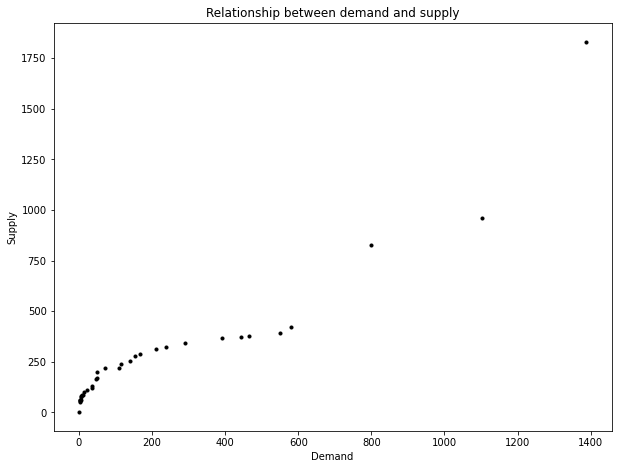

In [188]:
area = np.pi*3
colors=(0,0,0)
plt.scatter(demand, supply,c= colors,s=area, alpha=1)
plt.title('Relationship between demand and supply')
plt.xlabel('Demand')
plt.ylabel('Supply')
plt.show()

From the above scatter plot we can determine that the relationahip between demand and supply is non-linear. It is not perfectly consistent but there is some hope for the increase in demand due to supply. Althought making prediction on this is not reliable for future analysis.